In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
file = open(r'C:\Users\Akshat Singh\Desktop\Projects(Personal)\Whatsapp Group Chat Analysis\WhatsApp Chat with Cringe Factory.txt', encoding='utf-8')
#file

In [3]:
chat = file.read()
file.close()
#chat

## Data Preprocessing

In [4]:
msgs = re.findall('(\d+/\d+/\d+, \d+:\d+\d+ [A-Z]{2}) - (.*?): (.*)', chat) 
#'\' => don't treat as special char d' => digit (of the dates), '+' => one or more char of the same type, 
#'[A-Z]{2}' => 2 alphabets (AM, PM), '.' => any char, '*' => specified char zero or more times, '?' => make it lazy & not greedy
#msgs

In [5]:
type(msgs)

list

In [6]:
type(msgs[0])

tuple

In [7]:
msgs = pd.DataFrame(msgs, columns=['Date', 'Name', 'Message'])
msgs.head()

,Date,Name,Message
0,"11/17/20, 4:47 PM",Akshat RK Singh,<Media omitted>
1,"11/17/20, 4:50 PM",Akshat RK Singh,Add😂
2,"11/17/20, 5:12 PM",Akshat RK Singh,<Media omitted>
3,"11/17/20, 5:12 PM",Sakshi Rawat,<Media omitted>
4,"11/17/20, 5:13 PM",Akshat RK Singh,<Media omitted>


In [8]:
msgs.replace(to_replace='<Media omitted>',value='Non-Textual Media', inplace = True)
msgs

,Date,Name,Message
0,"11/17/20, 4:47 PM",Akshat RK Singh,Non-Textual Media
1,"11/17/20, 4:50 PM",Akshat RK Singh,Add😂
2,"11/17/20, 5:12 PM",Akshat RK Singh,Non-Textual Media
3,"11/17/20, 5:12 PM",Sakshi Rawat,Non-Textual Media
4,"11/17/20, 5:13 PM",Akshat RK Singh,Non-Textual Media
...,...,...,...
10070,"6/13/21, 12:46 PM",Akshat RK Singh,Non-Textual Media
10071,"6/13/21, 2:15 PM",Shradha,Non-Textual Media
10072,"6/13/21, 7:23 PM",Shradha,Non-Textual Media
10073,"6/13/21, 7:42 PM",Sakshi Rawat,🤭🤭🤭🤭lol


## Exploratory Data Analysis

In [9]:
msgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     10075 non-null  object
 1   Name     10075 non-null  object
 2   Message  10075 non-null  object
dtypes: object(3)
memory usage: 236.3+ KB


In [10]:
s = '10000th message sender : 10000th message -> ' + msgs['Name'].iat[9999] + " : " + msgs['Message'].iat[9999] 
print(s)

10000th message sender : 10000th message -> Akshat RK Singh : Gayaaaa


In [11]:
num_dict = dict(msgs['Name'].value_counts()) 
print(f'Participants : No. of messages -> {num_dict}')

Participants : No. of messages -> {'Sakshi Rawat': 3929, 'Akshat RK Singh': 3152, 'Shradha': 2994}


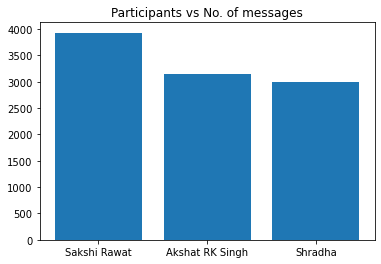

In [12]:
plt.title('Participants vs No. of messages')
plt.bar(list(num_dict.keys()), list(num_dict.values()))
plt.savefig('no-of-msgs.jpg')
plt.show()

In [13]:
from wordcloud import WordCloud
def plot_wordcloud(text):
    wordcloud = WordCloud(max_words=100, background_color='white', repeat='false', min_word_length=4).generate(",".join(text))
    plt.imshow(wordcloud, interpolation='bilinear')    # interpolation='bilinear' is to make the image smoother
    plt.axis("off")
    plt.show()
    wordcloud.to_file('./wordcloud.jpg')

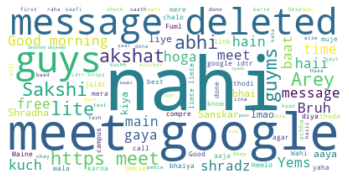

In [14]:
msgs_temp = msgs.replace(to_replace='Non-Textual Media',value='')
plot_wordcloud(msgs_temp['Message'])

In [15]:
len(msgs[msgs['Message'] == 'Non-Textual Media'])  # Total non-textual messages

3431

In [16]:
msgs['Message'].value_counts()['You deleted this message']

82

In [17]:
msgs_df = pd.DataFrame(msgs.groupby(['Name'])['Message'])
msgs_df

,0,1
0,Akshat RK Singh,0 Non-Textual Media 1 ...
1,Sakshi Rawat,3 Non-T...
2,Shradha,26 Non-Textual Media ...


In [18]:
del_dict_1 = {msgs_df[0][i]:(pd.Series(msgs_df[1][i])).str.count('You deleted this message').sum() for i in range (len(msgs_df))}
del_dict_2 = {msgs_df[0][i]:(pd.Series(msgs_df[1][i])).str.count('This message was deleted').sum() for i in range (len(msgs_df))}
#print(del_dict_1)
#print(del_dict_2)
del_dict = {msgs_df[0][i]:(pd.Series(msgs_df[1][i])).str.count('This message was deleted').sum() + pd.Series(msgs_df[1][i]).str.count('You deleted this message').sum() for i in range (len(msgs_df))}
print(f'Participants : No. of deleted messages -> {del_dict}')

Participants : No. of deleted messages -> {'Akshat RK Singh': 82, 'Sakshi Rawat': 20, 'Shradha': 44}


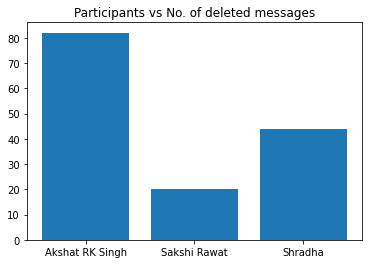

In [19]:
plt.title('Participants vs No. of deleted messages')
plt.bar(list(del_dict.keys()), list(del_dict.values()))
plt.savefig('no-of-del-msgs.jpg')
plt.show()

In [20]:
nontext_dict = {msgs_df[0][i]:(pd.Series(msgs_df[1][i])).str.count('Non-Textual Media').sum() for i in range (len(msgs_df))}
nontext_dict

{'Akshat RK Singh': 1013, 'Sakshi Rawat': 1154, 'Shradha': 1264}

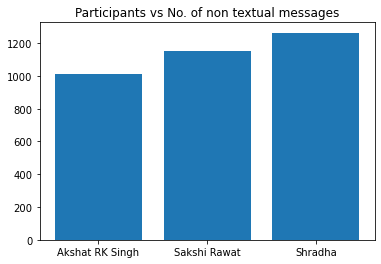

In [21]:
plt.title('Participants vs No. of non textual messages')
plt.bar(list(nontext_dict.keys()), list(nontext_dict.values()))
plt.savefig('no-of-nontext-msgs.jpg')
plt.show()

In [22]:
meetlink_dict = {msgs_df[0][i]:(pd.Series(msgs_df[1][i])).str.count('meet.google.com').sum() for i in range (len(msgs_df))}
meetlink_dict

{'Akshat RK Singh': 28, 'Sakshi Rawat': 31, 'Shradha': 65}

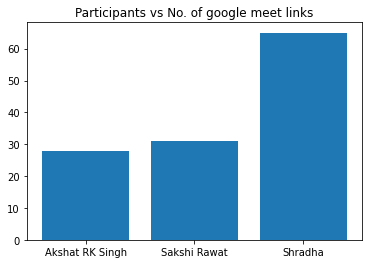

In [23]:
plt.title('Participants vs No. of google meet links')
plt.bar(list(meetlink_dict.keys()), list(meetlink_dict.values()))
plt.savefig('no-of-meet-links-msgs.jpg')
plt.show()